# Capstone Project – The Battle of Neighborhood

### Importing Python Libraries and Dependencies

In [1]:
#Importing all the required dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim 

import folium # map rendering library

import geopandas as gpd
import json

%matplotlib inline
mpl.style.use(['seaborn'])

print('Libraries imported.')

Libraries imported.


### Data Importing and Cleaning

In [2]:
# Dataset obtained from Central Statistics Office website give us a breakdown of population across Ireland based on multiple themes.
population_data = pd.read_csv("Data/SAPS2016_CTY31.csv")

In [3]:
population_data.head()

,GUID,GEOGID,GEOGDESC,T1_1AGE0M,T1_1AGE1M,T1_1AGE2M,T1_1AGE3M,T1_1AGE4M,T1_1AGE5M,T1_1AGE6M,T1_1AGE7M,T1_1AGE8M,T1_1AGE9M,T1_1AGE10M,T1_1AGE11M,T1_1AGE12M,T1_1AGE13M,T1_1AGE14M,T1_1AGE15M,T1_1AGE16M,T1_1AGE17M,T1_1AGE18M,T1_1AGE19M,T1_1AGE20_24M,T1_1AGE25_29M,T1_1AGE30_34M,T1_1AGE35_39M,T1_1AGE40_44M,T1_1AGE45_49M,T1_1AGE50_54M,T1_1AGE55_59M,T1_1AGE60_64M,T1_1AGE65_69M,T1_1AGE70_74M,T1_1AGE75_79M,T1_1AGE80_84M,T1_1AGEGE_85M,T1_1AGETM,T1_1AGE0F,T1_1AGE1F,T1_1AGE2F,T1_1AGE3F,T1_1AGE4F,T1_1AGE5F,T1_1AGE6F,T1_1AGE7F,T1_1AGE8F,T1_1AGE9F,T1_1AGE10F,T1_1AGE11F,T1_1AGE12F,T1_1AGE13F,T1_1AGE14F,T1_1AGE15F,T1_1AGE16F,T1_1AGE17F,T1_1AGE18F,T1_1AGE19F,T1_1AGE20_24F,T1_1AGE25_29F,T1_1AGE30_34F,T1_1AGE35_39F,T1_1AGE40_44F,T1_1AGE45_49F,T1_1AGE50_54F,T1_1AGE55_59F,T1_1AGE60_64F,T1_1AGE65_69F,T1_1AGE70_74F,T1_1AGE75_79F,T1_1AGE80_84F,T1_1AGEGE_85F,T1_1AGETF,T1_1AGE0T,T1_1AGE1T,T1_1AGE2T,T1_1AGE3T,T1_1AGE4T,T1_1AGE5T,T1_1AGE6T,T1_1AGE7T,T1_1AGE8T,T1_1AGE9T,T1_1AGE10T,T1_1AGE11T,T1_1AGE12T,T1_1AGE13T,T1_1AGE14T,T1_1AGE15T,T1_1AGE16T,T1_1AGE17T,T1_1AGE18T,T1_1AGE19T,T1_1AGE20_24T,T1_1AGE25_29T,T1_1AGE30_34T,T1_1AGE35_39T,T1_1AGE40_44T,T1_1AGE45_49T,T1_1AGE50_54T,T1_1AGE55_59T,T1_1AGE60_64T,T1_1AGE65_69T,T1_1AGE70_74T,T1_1AGE75_79T,T1_1AGE80_84T,T1_1AGEGE_85T,T1_1AGETT,T1_2SGLM,T1_2MARM,T1_2SEPM,T1_2DIVM,T1_2WIDM,T1_2TM,T1_2SGLF,T1_2MARF,T1_2SEPF,T1_2DIVF,T1_2WIDF,T1_2TF,T1_2SGLT,T1_2MART,T1_2SEPT,T1_2DIVT,T1_2WIDT,T1_2T,T2_1IEBP,T2_1UKBP,T2_1PLBP,T2_1LTBP,T2_1EUBP,T2_1RWBP,T2_1TBP,T2_1IEN,T2_1UKN,T2_1PLN,T2_1LTN,T2_1EUN,T2_1RWN,T2_1NSN,T2_1TN,T2_2WI,T2_2WIT,T2_2OW,T2_2BBI,T2_2AAI,T2_2OTH,T2_2NS,T2_2T,T2_3SA,T2_3EC,T2_3EI,T2_3OI,T2_3T,T2_4CA,T2_4OR,T2_4NR,T2_4NS,T2_4T,T2_5PL,T2_5FR,T2_5LT,T2_5OTH,T2_5T,T2_6VW,T2_6W,T2_6NW,T2_6NAA,T2_6NS,T2_6T,T3_1YES,T3_1NO,T3_1NS,T3_1T,T3_2DIM,T3_2DIDOM,T3_2DIWOM,T3_2DILOOM,T3_2DINOM,T3_2DOESM,T3_2WOESM,T3_2LOOESM,T3_2NOESM,T3_2NSM,T3_2ALLM,T3_2DIF,T3_2DIDOF,T3_2DIWOF,T3_2DILOOF,T3_2DINOF,T3_2DOESF,T3_2WOESF,T3_2LOOESF,T3_2NOESF,T3_2NSF,T3_2ALLF,T3_2DIT,T3_2DIDOT,T3_2DIWOT,T3_2DILOOT,T3_2DINOT,T3_2DOEST,T3_2WOEST,T3_2LOOEST,T3_2NOEST,T3_2NST,T3_2ALLT,T4_1_2PF,T4_1_3PF,T4_1_4PF,T4_1_5PF,T4_1_GRE_6PF,T4_1_TF,T4_1_2PP,T4_1_3PP,T4_1_4PP,T4_1_5PP,T4_1_GRE_6PP,T4_1_TP,T4_1_2PC,T4_1_3PC,T4_1_4PC,T4_1_5PC,T4_1_GRE_6PC,T4_1_TC,T4_2_1CU15,T4_2_2CU15,T4_2_3CU15,T4_2_4CU15,T4_2_GE5CU15,T4_2_TCU15,T4_2_1CO15,T4_2_2CO15,T4_2_3CO15,T4_2_4CO15,T4_2_GE5CO15,T4_2_TCO15,T4_2_2CUO15,T4_2_3CUO15,T4_2_4CUO15,T4_2_GE5CUO15,T4_2_TCUO15,T4_2_NCT,T4_2_1CT,T4_2_2CT,T4_2_3CT,T4_2_4CT,T4_2_GE5CT,T4_2_TCT,T4_3FCCU15,T4_3FCCO15,T4_3FCCUO15,T4_3FCCT,T4_3FOPMCU15,T4_3FOPMCO15,T4_3FOPMCUO15,T4_3FOPMCT,T4_3FOPFCU15,T4_3FOPFCO15,T4_3FOPFCUO15,T4_3FOPFCT,T4_3CCCU15,T4_3CCCO15,T4_3CCCUO15,T4_3CCCT,T4_3COPMCU15,T4_3COPMCO15,T4_3COPMCUO15,T4_3COPMCT,T4_3COPFCU15,T4_3COPFCO15,T4_3COPFCUO15,T4_3COPFCT,T4_4AGE0_4F,T4_4AGE5_9F,T4_4AGE10_14F,T4_4AGE15_19F,T4_4AGE_GE20F,T4_4TF,T4_4AGE0_4P,T4_4AGE5_9P,T4_4AGE10_14P,T4_4AGE15_19P,T4_4AGE_GE20P,T4_4TP,T4_5PFF,T4_5ENF,T4_5RF,T4_5PSF,T4_5ESF,T4_5PAF,T4_5ADOF,T4_5ADUF,T4_5TF,T4_5PFP,T4_5ENP,T4_5RP,T4_5PSP,T4_5ESP,T4_5PAP,T4_5ADOP,T4_5ADUP,T4_5TP,T4_6_0C,T4_6_1C,T4_6_2C,T4_6_3C,T4_6_GE4C,T4_6T,T5_1OP_H,T5_1MC_H,T5_1CC_H,T5_1MCC_H,T5_1CCC_H,T5_1OPFC_H,T5_1OPMC_H,T5_1CO_H,T5_1CCO_H,T5_1OPFCO_H,T5_1OPMCO_H,T5_1GETFU_H,T5_1NHR_H,T5_1GENP_H,T5_1T_H,T5_1OP_P,T5_1MC_P,T5_1CC_P,T5_1MCC_P,T5_1CCC_P,T5_1OPFC_P,T5_1OPMC_P,T5_1CO_P,T5_1CCO_P,T5_1OPFCO_P,T5_1OPMCO_P,T5_1GETFU_P,T5_1NHR_P,T5_1GENP_P,T5_1T_P,T5_2_1PH,T5_2_2PH,T5_2_3PH,T5_2_4PH,T5_2_5PH,T5_2_6PH,T5_2_7PH,T5_2_GE8PH,T5_2_TH,T5_2_1PP,T5_2_2PP,T5_2_3PP,T5_2_4PP,T5_2_5PP,T5_2_6PP,T5_2_7PP,T5_2_GE8PP,T5_2_TP,T6_1_HB_H,T6_1_FA_H,T6_1_BS_H,T6_1_CM_H,T6_1_NS_H,T6_1_TH,T6_1_HB_P,T6_1_FA_P,T6_1_BS_P,T6_1_CM_P,T6_1_NS_P,T6_1_TP,T6_2_PRE19H,T6_2_19_45H,T6_2_46_60H,T6_2_61_70H,T6_2_71_80H,T6_2_81_90H,T6_2_91_00H,T6_2_01_10H,T6_2_11LH,T6_2_NSH,T6_2_TH,T6_2_PRE19P,T6_2_19_45P,T6_2_46_60P,T6_2_61_70P,T6_2_71_80P,T6_2_81_90P,T6_2_91_00P,T6_2_01_10P,T6_2_11LP,T6_2_NSP,T6_2_TP,T6_3

In [4]:
# Contains description of each header of above input file

header_desc = pd.read_csv("Data/Theme_breakdown.csv")

In [5]:
header_desc.head()

,THEME,TABLES WITHIN THEMES,FIELD NAME WITHIN SAPS TABLES,DESCRIPTION OF FIELD
0,"Theme 1 Sex, Age and Marital Status","Population aged 0-19 by sex and year of age, p...",T1_1AGE0M,Age 0 Males
1,"Theme 1 Sex, Age and Marital Status","Population aged 0-19 by sex and year of age, p...",T1_1AGE1M,Age 1 Males
2,"Theme 1 Sex, Age and Marital Status","Population aged 0-19 by sex and year of age, p...",T1_1AGE2M,Age 2 Males
3,"Theme 1 Sex, Age and Marital Status","Population aged 0-19 by sex and year of age, p...",T1_1AGE3M,Age 3 Males
4,"Theme 1 Sex, Age and Marital Status","Population aged 0-19 by sex and year of age, p...",T1_1AGE4M,Age 4 Males


In [6]:
# The table within themes we're to focus on are ethnic and cultural background.

header_desc[header_desc['TABLES WITHIN THEMES'].str.contains("ethnic")]

,THEME,TABLES WITHIN THEMES,FIELD NAME WITHIN SAPS TABLES,DESCRIPTION OF FIELD
139,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2WI,White Irish
140,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2WIT,White Irish Traveller
141,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2OW,Other White
142,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2BBI,Black or Black Irish
143,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2AAI,Asian or Asian Irish
144,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2OTH,Other
145,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2NS,Not Stated
146,"Theme 2 Migration, Ethnicity and Religion",Usually resident population by ethnic or cultu...,T2_2T,Total


In [7]:
# The group we're particularly interested in is Asian[Indian] or Asian Irish[Indian].
# People when living abord/away from crave for home country style food, and because this study is focused on Indian food. 
# We're assming them to be our largest customer base.

roi_pop = population_data[["GEOGDESC","T2_2AAI","T2_2T"]].copy()

In [8]:
roi_pop.head()

,GEOGDESC,T2_2AAI,T2_2T
0,Cork City,3398,123019
1,Clare,1653,116460
2,Cork County,4436,412826
3,Cavan,1073,75320
4,Carlow,721,56476


In [9]:
roi_pop.rename(columns={"GEOGDESC":"ADMINISTRATIVE_AREA", "T2_2AAI":"ASIAN_POPULATION", "T2_2T":"TOTAL_POPULATION"}, inplace = True)

In [10]:
roi_pop

,ADMINISTRATIVE_AREA,ASIAN_POPULATION,TOTAL_POPULATION
0,Cork City,3398,123019
1,Clare,1653,116460
2,Cork County,4436,412826
3,Cavan,1073,75320
4,Carlow,721,56476
5,Dublin City,20172,537190
6,Donegal,1521,156169
7,Dún Laoghaire-Rathdown,7571,213519
8,Fingal,11514,292327
9,Galway City,2356,75691


#### As per Ordnance Survey Irealnd website - 

The Local Government Reform Act 2014 Section 9 provided for the amalgamation of the city and county councils in Limerick, Waterford, and North Tipperary and South Tipperary County Councils. 
The country is divided into 31 administrative counties/cities. There are now 26 administrative counties including the five administrative counties of Cork County, Galway County, Dún Laoghaire-Rathdown, Fingal and South Dublin.
 
 There are 5 city/city and county areas namely Cork City, Dublin City, Galway City, Limerick City and County and Waterford City and County.

In [11]:
def get_geodatasource(gdf):    
    """Get getjsondatasource from geopandas object"""
    json_data = json.dumps(json.loads(gdf.to_json()))
    return GeoJSONDataSource(geojson = json_data)

In [12]:
# The idea is to plot a heat map of Asian Population across different counties across Ireland, hence using shapefile.
# This shapefile was obtained from OSi Website
# Link : https://data-osi.opendata.arcgis.com/datasets/0d5984f732c54246bd087768223c92eb_0?geometry=-23.747%2C51.281%2C8.927%2C55.844
shp_file = gpd.read_file('Data/Administrative_Areas_2016.shp')

In [13]:
pop_shp = shp_file[["ENGLISH","COUNTY","PROVINCE","geometry"]].copy()
pop_shp.rename(columns={"ENGLISH":"ADMINISTRATIVE_AREA","coords":"GEOMETRY"}, inplace=True)
pop_shp.ADMINISTRATIVE_AREA = pop_shp.ADMINISTRATIVE_AREA.apply(lambda x: x.replace(' COUNCIL', ''))

In [14]:
roi_pop.ADMINISTRATIVE_AREA = roi_pop.ADMINISTRATIVE_AREA.apply(lambda x: x.upper())

In [15]:
pop_data = pop_shp.merge(roi_pop, left_on = "ADMINISTRATIVE_AREA", right_on = "ADMINISTRATIVE_AREA", how = 'left')
pop_data[pd.isnull(pop_data).any(axis=1)]

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,geometry,ASIAN_POPULATION,TOTAL_POPULATION
3,OFFALY COUNTY,OFFALY,Leinster,"POLYGON ((601413.034 731844.629, 601521.020 73...",NaN,NaN
4,WICKLOW COUNTY,WICKLOW,Leinster,"MULTIPOLYGON (((725059.067 671896.428, 725061....",NaN,NaN
5,TIPPERARY COUNTY,TIPPERARY,Munster,"POLYGON ((616914.070 621070.803, 616835.024 62...",NaN,NaN
6,MONAGHAN COUNTY,MONAGHAN,Ulster,"POLYGON ((664118.870 817118.842, 663865.958 81...",NaN,NaN
7,SLIGO COUNTY,SLIGO,Connacht,"MULTIPOLYGON (((581621.643 822661.425, 582459....",NaN,NaN
8,WEXFORD COUNTY,WEXFORD,Leinster,"MULTIPOLYGON (((701484.196 623113.847, 701603....",NaN,NaN
9,SOUTH DUBLIN COUNTY,DUBLIN,Leinster,"POLYGON ((708091.837 732148.880, 709857.283 73...",NaN,NaN
10,FINGAL COUNTY,DUBLIN,Leinster,"MULTIPOLYGON (((710748.484 749712.282, 710713....",NaN,NaN
11,CLARE COUNTY,CLARE,Munster,"MULTIPOLYGON (((538330.493 702127.408, 538590....",NaN,NaN
12,DONEGAL COUNTY,DONEGAL,Ulster,"MULTIPOLYGON (((634633.400 900804.962, 634587....",NaN,NaN


In [16]:
pop_shp.ADMINISTRATIVE_AREA = pop_shp.ADMINISTRATIVE_AREA.apply(lambda x: x if "CITY" in x else x.replace(' COUNTY', ''))
pop_data = pop_shp.merge(roi_pop, left_on = "ADMINISTRATIVE_AREA", right_on = "ADMINISTRATIVE_AREA", how = 'left')
pop_data[pd.isnull(pop_data).any(axis=1)]

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,geometry,ASIAN_POPULATION,TOTAL_POPULATION
21,DUN LAOGHAIRE-RATHDOWN,DUBLIN,Leinster,"MULTIPOLYGON (((726029.569 724958.910, 725964....",NaN,NaN
22,GALWAY,GALWAY,Connacht,"MULTIPOLYGON (((587504.376 731428.868, 587456....",NaN,NaN
24,CORK,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539702....",NaN,NaN


In [17]:
pop_shp.loc[24,"ADMINISTRATIVE_AREA"] = "CORK COUNTY"
pop_shp.loc[22,"ADMINISTRATIVE_AREA"] = "GALWAY COUNTY"
pop_shp.loc[21,"ADMINISTRATIVE_AREA"] = "DÚN LAOGHAIRE-RATHDOWN"

In [18]:
pop_data = pop_shp.merge(roi_pop, left_on = "ADMINISTRATIVE_AREA", right_on = "ADMINISTRATIVE_AREA", how = 'left')

### Locking administrative areas for analysis

In [19]:
pop_data.sort_values('ASIAN_POPULATION', ascending=False).head(10)

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,geometry,ASIAN_POPULATION,TOTAL_POPULATION
0,DUBLIN CITY,DUBLIN,Leinster,"POLYGON ((707601.055 732888.993, 707493.545 73...",20172,537190
10,FINGAL,DUBLIN,Leinster,"MULTIPOLYGON (((710748.484 749712.282, 710713....",11514,292327
9,SOUTH DUBLIN,DUBLIN,Leinster,"POLYGON ((708091.837 732148.880, 709857.283 73...",11334,276066
21,DÚN LAOGHAIRE-RATHDOWN,DUBLIN,Leinster,"MULTIPOLYGON (((726029.569 724958.910, 725964....",7571,213519
24,CORK COUNTY,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539702....",4436,412826
16,LIMERICK CITY AND COUNTY,LIMERICK,Munster,"POLYGON ((565633.820 666243.290, 565697.247 66...",4243,192677
17,KILDARE,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700317.074 73...",4064,220516
1,CORK CITY,CORK,Munster,"POLYGON ((573571.769 572523.376, 573808.319 57...",3398,123019
13,MEATH,MEATH,Leinster,"POLYGON ((667453.733 762098.703, 667516.759 76...",2584,193419
19,LOUTH,LOUTH,Leinster,"MULTIPOLYGON (((698657.439 813503.599, 698729....",2406,127762


In [20]:
pop_data.sort_values('TOTAL_POPULATION', ascending=False).head(10)

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,geometry,ASIAN_POPULATION,TOTAL_POPULATION
0,DUBLIN CITY,DUBLIN,Leinster,"POLYGON ((707601.055 732888.993, 707493.545 73...",20172,537190
24,CORK COUNTY,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539702....",4436,412826
10,FINGAL,DUBLIN,Leinster,"MULTIPOLYGON (((710748.484 749712.282, 710713....",11514,292327
9,SOUTH DUBLIN,DUBLIN,Leinster,"POLYGON ((708091.837 732148.880, 709857.283 73...",11334,276066
17,KILDARE,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700317.074 73...",4064,220516
21,DÚN LAOGHAIRE-RATHDOWN,DUBLIN,Leinster,"MULTIPOLYGON (((726029.569 724958.910, 725964....",7571,213519
13,MEATH,MEATH,Leinster,"POLYGON ((667453.733 762098.703, 667516.759 76...",2584,193419
16,LIMERICK CITY AND COUNTY,LIMERICK,Munster,"POLYGON ((565633.820 666243.290, 565697.247 66...",4243,192677
22,GALWAY COUNTY,GALWAY,Connacht,"MULTIPOLYGON (((587504.376 731428.868, 587456....",1591,177215
5,TIPPERARY,TIPPERARY,Munster,"POLYGON ((616914.070 621070.803, 616835.024 62...",1505,158305


### Visualizing Asian Population across Administrative Areas in ROI

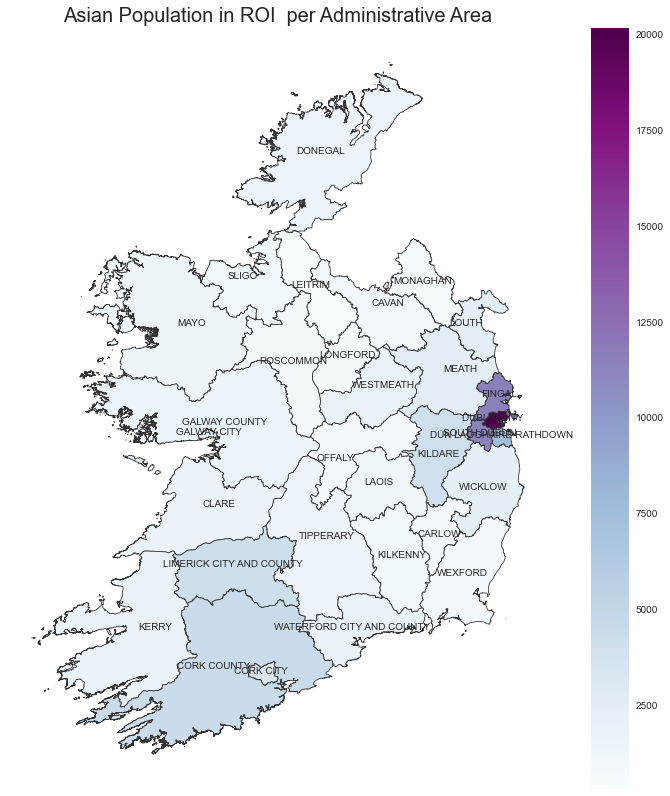

In [21]:
fig, ax = plt.subplots(1, figsize=(15,14))
pop_data.plot(column='ASIAN_POPULATION', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.2',legend=True)
df = pop_data
df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:][0])
for idx, row in df.iterrows():
    plt.annotate(s=row['ADMINISTRATIVE_AREA'], xy=row['coords'],
                 horizontalalignment='center')
ax.axis('off')
ax.set_title('Asian Population in ROI  per Administrative Area',fontsize=20)
plt.savefig('Results/Asian_Population.png',dpi=50)

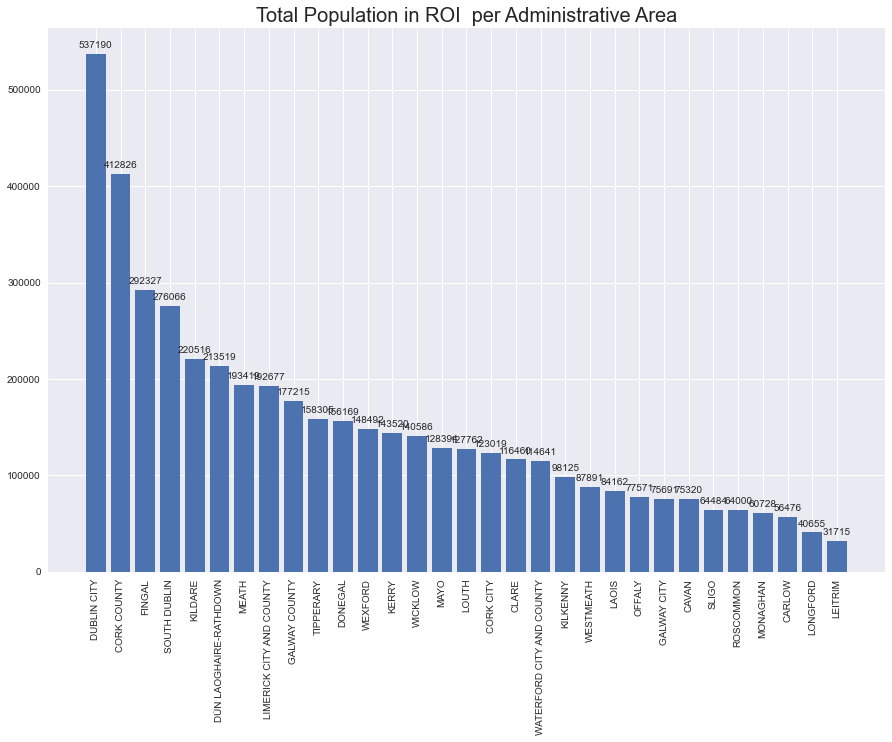

In [22]:
sorted_pop_data= pop_data.sort_values('TOTAL_POPULATION', ascending=False)
fig2, ax = plt.subplots(1, figsize=(15,10))
plt.bar(sorted_pop_data.ADMINISTRATIVE_AREA, sorted_pop_data.TOTAL_POPULATION)
plt.xticks(rotation=90)
for i in range(len(sorted_pop_data.TOTAL_POPULATION)):
    plt.annotate('{}'.format(sorted_pop_data.TOTAL_POPULATION[i]), xy=(sorted_pop_data.ADMINISTRATIVE_AREA[i],sorted_pop_data.TOTAL_POPULATION[i]),xytext=(0,4), 
                   textcoords="offset points", ha="center", va="bottom")
    plt.title('Total Population in ROI  per Administrative Area',fontsize=20)
plt.show()

In [23]:
data = pop_data.copy()
data.drop(["geometry","coords"], axis=1, inplace=True)

In [24]:
# Add get the geographical co-rodinates file.
cordinates = pd.read_csv("Data/Administrative_Areas_Coordinates.csv")

In [25]:
df = data.merge(cordinates, left_on = "ADMINISTRATIVE_AREA", right_on = "ADMINISTRATIVE_AREA", how = 'left')

In [26]:
#Sorting the data as we are only interested in top 10 Administrative Areas
df.sort_values('TOTAL_POPULATION', ascending=False, inplace=True)

In [27]:
top_aa = df.iloc[0:10].reset_index()

In [28]:
top_aa.drop("index", axis =1, inplace=True)

#### Creating a map of Ireland with top 10 Administrative areas superimposed

In [29]:
latitude_x = 53.2734
longitude_y = -7.77832031

map_Ireland = folium.Map(location=[latitude_x, longitude_y], zoom_start=7) 
for lat, lng, nei in zip(top_aa['Latitude'], top_aa['Longitude'], top_aa['ADMINISTRATIVE_AREA']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Ireland)  
    
map_Ireland

#### Defining Foursqaure credential and version

In [30]:
CLIENT_ID = 'CLIENT_ID_XXX' # my Foursquare ID
CLIENT_SECRET = '************' # my Foursquare Secret
VERSION = '20201203'
print('Credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Credentails:
CLIENT_ID: Y2OZJ0YBPIHCB3YSBST4BZ25UV0DNT5AEQLO4OI2BJ5ADFAN
CLIENT_SECRET: FTQANAPIJRTXEFBM3FR2MOMZQPQMYMTZXQXX2ZRNZHIJZFNO


### Analysing - Popular Cuisines in Ireland

#### Below are top 10 administrative areas by general population in Ireland for our analysis.

In [31]:
# The top 10 administrative areas for our analysis are as follows-
top_aa

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,ASIAN_POPULATION,TOTAL_POPULATION,Latitude,Longitude
0,DUBLIN CITY,DUBLIN,Leinster,20172,537190,53.35512,-6.24922
1,CORK COUNTY,CORK,Munster,4436,412826,51.96667,-8.58333
2,FINGAL,DUBLIN,Leinster,11514,292327,53.45909,-6.21942
3,SOUTH DUBLIN,DUBLIN,Leinster,11334,276066,53.28595,-6.37739
4,KILDARE,KILDARE,Leinster,4064,220516,53.16667,-6.75000
5,DÚN LAOGHAIRE-RATHDOWN,DUBLIN,Leinster,7571,213519,53.29436,-6.13489
6,MEATH,MEATH,Leinster,2584,193419,53.66667,-6.66667
7,LIMERICK CITY AND COUNTY,LIMERICK,Munster,4243,192677,52.66806,-8.65024
8,GALWAY COUNTY,GALWAY,Connacht,1591,177215,53.33333,-9.00000
9,TIPPERARY,TIPPERARY,Munster,1505,158305,52.66667,-7.83333


In [32]:
#Creating an additional columns required to obtain our data using foursquare api.
top_aa['ll'] = top_aa['Latitude'].astype(str) + "," + top_aa['Longitude'].astype(str)
top_aa['radius'] = '0'

In [33]:
#Used maps.ie to Measure Circle / Radius on a map to determine approx shortest radius of each administrative area without overlap.
top_aa['radius'][0] = '4500'
top_aa['radius'][1] = '35000'
top_aa['radius'][2] = '6300'
top_aa['radius'][3] = '5700'
top_aa['radius'][4] = '16000'
top_aa['radius'][5] = '6800'
top_aa['radius'][6] = '18000'
top_aa['radius'][7] = '3000'
top_aa['radius'][8] = '5266'
top_aa['radius'][9] = '18500'

D:\Softwares\Anaconda3\envs\pyt_specialization\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Softwares\Anaconda3\envs\pyt_specialization\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Softwares\Anaconda3\envs\pyt_specialization\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [34]:
top_aa.head()

,ADMINISTRATIVE_AREA,COUNTY,PROVINCE,ASIAN_POPULATION,TOTAL_POPULATION,Latitude,Longitude,ll,radius
0,DUBLIN CITY,DUBLIN,Leinster,20172,537190,53.35512,-6.24922,"53.35511999999999,-6.249219999999999",4500
1,CORK COUNTY,CORK,Munster,4436,412826,51.96667,-8.58333,"51.96667,-8.58333",35000
2,FINGAL,DUBLIN,Leinster,11514,292327,53.45909,-6.21942,"53.45909,-6.2194199999999995",6300
3,SOUTH DUBLIN,DUBLIN,Leinster,11334,276066,53.28595,-6.37739,"53.28595,-6.37739",5700
4,KILDARE,KILDARE,Leinster,4064,220516,53.16667,-6.75000,"53.166669999999996,-6.75",16000


##### Using the list of international cuisines (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/) to determine number of restaurants and detailed list of restaurants serving each kind of cuisines.

In [35]:
URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, 100)

# List of international cuisines (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/)
cuisines = {
    'Afghan': '503288ae91d4c4b30a586d67', 
    'African': '4bf58dd8d48988d1c8941735', 
    'American': '4bf58dd8d48988d14e941735', 
    'Burmese': '56aa371be4b08b9a8d573568', 
    'Cambodian': '52e81612bcbc57f1066b7a03', 
    'Chinese': '4bf58dd8d48988d145941735', 
    'Filipino': '4eb1bd1c3b7b55596b4a748f', 
    'Himalayan': '52e81612bcbc57f1066b79fb', 
    'Indonesian': '4deefc054765f83613cdba6f', 
    'Japanese': '4bf58dd8d48988d111941735', 
    'Korean': '4bf58dd8d48988d113941735', 
    'Malay': '4bf58dd8d48988d156941735', 
    'Mongolian': '4eb1d5724b900d56c88a45fe', 
    'Thai': '4bf58dd8d48988d149941735', 
    'Tibetan': '52af39fb3cf9994f4e043be9', 
    'Vietnamese': '4bf58dd8d48988d14a941735', 
    'Australian': '4bf58dd8d48988d169941735', 
    'Austrian': '52e81612bcbc57f1066b7a01', 
    'Bangladeshi': '5e179ee74ae8e90006e9a746', 
    'Belgian': '52e81612bcbc57f1066b7a02', 
    'Caribbean': '4bf58dd8d48988d144941735', 
    'Caucasian': '5293a7d53cf9994f4e043a45', 
    'Czech': '52f2ae52bcbc57f1066b8b81', 
    'Dutch': '5744ccdfe4b0c0459246b4d0', 
    'Belarusian': '52e928d0bcbc57f1066b7e97', 
    'Bosnian': '58daa1558bbb0b01f18ec1ee', 
    'Bulgarian': '56aa371be4b08b9a8d5734f3', 
    'Romanian': '52960bac3cf9994f4e043ac4', 
    'Tatar': '52e928d0bcbc57f1066b7e98', 
    'English': '52e81612bcbc57f1066b7a05', 
    'French': '4bf58dd8d48988d10c941735', 
    'German': '4bf58dd8d48988d10d941735', 
    'Greek': '4bf58dd8d48988d10e941735', 
    'Hawaiian': '52e81612bcbc57f1066b79fe', 
    'Hungarian': '52e81612bcbc57f1066b79fa', 
    'Indian': '4bf58dd8d48988d10f941735', 
    'Italian': '4bf58dd8d48988d110941735', 
    'Salvadoran': '5745c7ac498e5d0483112fdb', 
    'Argentinian': '4bf58dd8d48988d107941735', 
    'Brazilian': '4bf58dd8d48988d16b941735', 
    'Colombian': '58daa1558bbb0b01f18ec1f4', 
    'Peruvian': '4eb1bfa43b7b52c0e1adc2e8', 
    'Venezuelan': '56aa371be4b08b9a8d573558', 
    'Moroccan': '4bf58dd8d48988d1c3941735', 
    'Mexican': '4bf58dd8d48988d1c1941735', 
    'Egyptian': '5bae9231bedf3950379f89e1', 
    'Iraqi': '5bae9231bedf3950379f89e7', 
    'Israeli': '56aa371be4b08b9a8d573529', 
    'Kurdish': '5744ccdfe4b0c0459246b4ca', 
    'Lebanese': '58daa1558bbb0b01f18ec1cd', 
    'Persian': '52e81612bcbc57f1066b79f7', 
    'Syrian': '5bae9231bedf3950379f89da', 
    'Yemeni': '5bae9231bedf3950379f89ea', 
    'Pakistani': '52e81612bcbc57f1066b79f8', 
    'Polish': '52e81612bcbc57f1066b7a04', 
    'Portuguese': '4def73e84765ae376e57713a', 
    'Russian': '5293a7563cf9994f4e043a44', 
    'Scandinavian': '4bf58dd8d48988d1c6941735', 
    'Scottish': '5744ccdde4b0c0459246b4a3', 
    'Slovak': '56aa371be4b08b9a8d57355a', 
    'Spanish': '4bf58dd8d48988d150941735', 
    'Sri Lankan': '5413605de4b0ae91d18581a9', 
    'Swiss': '4bf58dd8d48988d158941735', 
    'Turkish': '4f04af1f2fb6e1c99f3db0bb', 
    'Ukranian': '52e928d0bcbc57f1066b7e96'
}

In [36]:
req_aa = top_aa.to_dict('records')

In [37]:
restaurants_summary = pd.DataFrame(columns=['Administrative_Area', 'Cuisine', 'Number of restaurants']) # define the DataFrame where the results will be stored
restaurants_details = pd.DataFrame(columns=['Administrative_Area', 'Cuisine', 'Restaurant_id', 'Restaurant_Name', "Restaurant_Lat", "Restaurant_Lon"]) ## define the DataFrame where the detailed results will be stored

for area in req_aa:
    print(area['ADMINISTRATIVE_AREA'])
    for cuisine_name, category_id in cuisines.items():
        # For each city, retrieve the top restaurants from Foursquare for each cuisine...
        query = requests.get("{url}&radius={radius}&ll={lat_lon}&categoryId={category_id}".format(url=URL, radius= area['radius'], lat_lon=area['ll'], category_id=category_id))
        if query.status_code == 200:
            result = query.json()
            restaurants_summary = restaurants_summary.append({
                'Administrative_Area': area['ADMINISTRATIVE_AREA'],
                'Cuisine': cuisine_name,
                'Number of restaurants': result['response']['totalResults']
            }, ignore_index=True)
            
            if result['response']['totalResults'] > 0:
                for i in range(0, (len(result["response"]["groups"][0]["items"]))-1 ):
                    restaurants_details = restaurants_details.append({
                        'Administrative_Area': area['ADMINISTRATIVE_AREA'],
                        'Cuisine': cuisine_name,
                        'Restaurant_id': result["response"]["groups"][0]["items"][i]["venue"]["id"],
                        'Restaurant_Name': result["response"]["groups"][0]["items"][i]["venue"]["name"],
                        'Restaurant_Lat': result["response"]["groups"][0]["items"][i]["venue"]["location"]["lat"], 
                        'Restaurant_Lon': result["response"]["groups"][0]["items"][i]["venue"]["location"]["lng"]
                        }, ignore_index=True)

DUBLIN CITY
CORK COUNTY
FINGAL
SOUTH DUBLIN
KILDARE
DÚN LAOGHAIRE-RATHDOWN
MEATH
LIMERICK CITY AND COUNTY
GALWAY COUNTY
TIPPERARY


In [38]:
restaurants_summary

,Administrative_Area,Cuisine,Number of restaurants
0,DUBLIN CITY,Afghan,2
1,DUBLIN CITY,African,4
2,DUBLIN CITY,American,27
3,DUBLIN CITY,Burmese,0
4,DUBLIN CITY,Cambodian,0
5,DUBLIN CITY,Chinese,53
6,DUBLIN CITY,Filipino,1
7,DUBLIN CITY,Himalayan,1
8,DUBLIN CITY,Indonesian,1
9,DUBLIN CITY,Japanese,39


In [39]:
restaurants_details

,Administrative_Area,Cuisine,Restaurant_id,Restaurant_Name,Restaurant_Lat,Restaurant_Lon
0,DUBLIN CITY,Afghan,57f544f4498e9282a9682873,Afghan Restaurant,53.338610,-6.265878
1,DUBLIN CITY,African,4e398411b61c438b5487b701,Akwaaba,53.352742,-6.244516
2,DUBLIN CITY,African,4afbcb53f964a520141f22e3,Il Caffè di Napoli,53.342692,-6.250147
3,DUBLIN CITY,African,4c13966ba5eb76b0f01ec0b7,Akanchawa's Honey Pot,53.354090,-6.269668
4,DUBLIN CITY,American,4cdd9beaf8a4a1431027d1bc,The Butcher Grill,53.324288,-6.252728
5,DUBLIN CITY,American,4b8d5387f964a520c1f432e3,TriBeCa,53.324367,-6.252996
6,DUBLIN CITY,American,4ade0f09f964a520de7021e3,Hard Rock Cafe Dublin,53.345878,-6.260866
7,DUBLIN CITY,American,4fc62996e4b0505c6e36dba1,TGI Fridays,53.345863,-6.259748
8,DUBLIN CITY,American,51acdfab498ea50be7f3de5f,Bunsen,53.337270,-6.265669
9,DUBLIN CITY,American,59eb6000f62e0902f051ff72,Ruby's,53.348447,-6.227838


#### Based on number of restaurant serving particular cuisines, top 10 cuisines in each administrative area are -

In [40]:
# One-hot encoding
restaurants_onehot = pd.get_dummies(restaurants_summary['Cuisine'], prefix="", prefix_sep="")
restaurants_onehot = restaurants_onehot.multiply(restaurants_summary['Number of restaurants'], axis=0)
restaurants_onehot = pd.concat([restaurants_summary['Administrative_Area'], restaurants_onehot], axis=1)

# Group by city
cuisines_city = restaurants_onehot.groupby('Administrative_Area').sum().reset_index()
cuisines_city = cuisines_city.set_index(keys='Administrative_Area')

# Normalize the numbers
cuisines_city_normalized = cuisines_city.div(cuisines_city.sum(axis=1), axis=0)
cuisines_city_normalized = 100*cuisines_city_normalized

# Show the final DataFrame
cuisines_city_normalized

,Afghan,African,American,Argentinian,Australian,Austrian,Bangladeshi,Belarusian,Belgian,Bosnian,Brazilian,Bulgarian,Burmese,Cambodian,Caribbean,Caucasian,Chinese,Colombian,Czech,Dutch,Egyptian,English,Filipino,French,German,Greek,Hawaiian,Himalayan,Hungarian,Indian,Indonesian,Iraqi,Israeli,Italian,Japanese,Korean,Kurdish,Lebanese,Malay,Mexican,Mongolian,Moroccan,Pakistani,Persian,Peruvian,Polish,Portuguese,Romanian,Russian,Salvadoran,Scandinavian,Scottish,Slovak,Spanish,Sri Lankan,Swiss,Syrian,Tatar,Thai,Tibetan,Turkish,Ukranian,Venezuelan,Vietnamese,Yemeni
Administrative_Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CORK COUNTY,0.000000,0.000000,5.555556,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.777778,0.0,0.0,0.0,0.000000,0.0,13.888889,0.000000,0.000000,0.000000,0.0,1.851852,0.000000,4.629630,0.000000,0.925926,0.925926,0.000000,0.925926,9.259259,0.925926,0.0,0.000000,22.222222,6.481481,0.000000,0.0,0.925926,3.703704,4.629630,0.000000,1.851852,0.000000,0.000000,0.000000,2.777778,3.703704,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.703704,0.0,0.000000,0.0,0.0,4.629630,0.0,3.703704,0.0,0.000000,0.000000,0.0
DUBLIN CITY,0.363636,0.727273,4.909091,0.909091,0.727273,0.0,0.0,0.0,0.727273,0.0,2.909091,0.0,0.0,0.0,0.181818,0.0,9.636364,0.181818,1.090909,0.181818,0.0,1.454545,0.181818,10.000000,0.181818,1.818182,0.545455,0.181818,0.181818,7.090909,0.181818,0.0,0.181818,16.545455,7.090909,1.818182,0.0,0.363636,0.909091,9.272727,0.181818,0.909091,0.363636,0.363636,0.181818,0.545455,0.909091,0.363636,0.909091,0.0,0.0,0.363636,0.0,3.272727,0.0,0.363636,0.0,0.0,6.727273,0.0,2.363636,0.0,0.181818,1.454545,0.0
DÚN LAOGHAIRE-RATHDOWN,0.000000,1.351351,5.405405,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,14.864865,0.000000,0.000000,0.000000,0.0,1.351351,1.351351,6.756757,1.351351,0.000000,1.351351,0.000000,0.000000,10.810811,0.000000,0.0,0.000000,24.324324,5.405405,2.702703,0.0,1.351351,0.000000,2.702703,0.000000,1.351351,0.000000,0.000000,0.000000,0.000000,1.351351,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.351351,0.0,1.351351,0.0,0.0,13.513514,0.0,0.000000,0.0,0.000000,0.000000,0.0
FINGAL,0.000000,2.127660,10.638298,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,10.638298,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.382979,0.000000,2.127660,2.127660,2.127660,0.000000,8.510638,0.000000,0.0,0.000000,27.659574,4.255319,0.000000,0.0,0.000000,2.127660,2.127660,0.000000,0.000000,0.000000,2.127660,0.000000,0.000000,2.127660,0.000000,0.000000,0.0,0.0,0.000000,0.0,4.255319,0.0,0.000000,0.0,0.0,8.510638,0.0,0.000000,0.0,0.000000,2.127660,0.0
GALWAY COUNTY,0.000000,0.000000,16.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,33.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000,0.0,0.000000,33.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
KILDARE,0.000000,0.000000,9.756098,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,9.756098,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7.317073,0.000000,0.000000,0.000000,0.000000,0.000000,14.634146,0.000000,0.0,0.000000,21.951220,7.317073,0.000000,0.0,0.000000,2.439024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.439024,2.439024,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.439024,0.0,0.000000,0.0,0.0,19.512195,0.0,0.000000,0.0,0.000000,0.000000,0.0
LIMERICK CITY AND COUNTY,0.000000,0.000000,6.666667,2.222222,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,6.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,6.666667,0.000000,4.444444,2.222222,0.000000,0.000000,8.888889,0.000000,0.0,0.000000,20.000000,4.444444,0.000000,0.0,0.000000,0.000000,11.111111,0.000000,0.0000

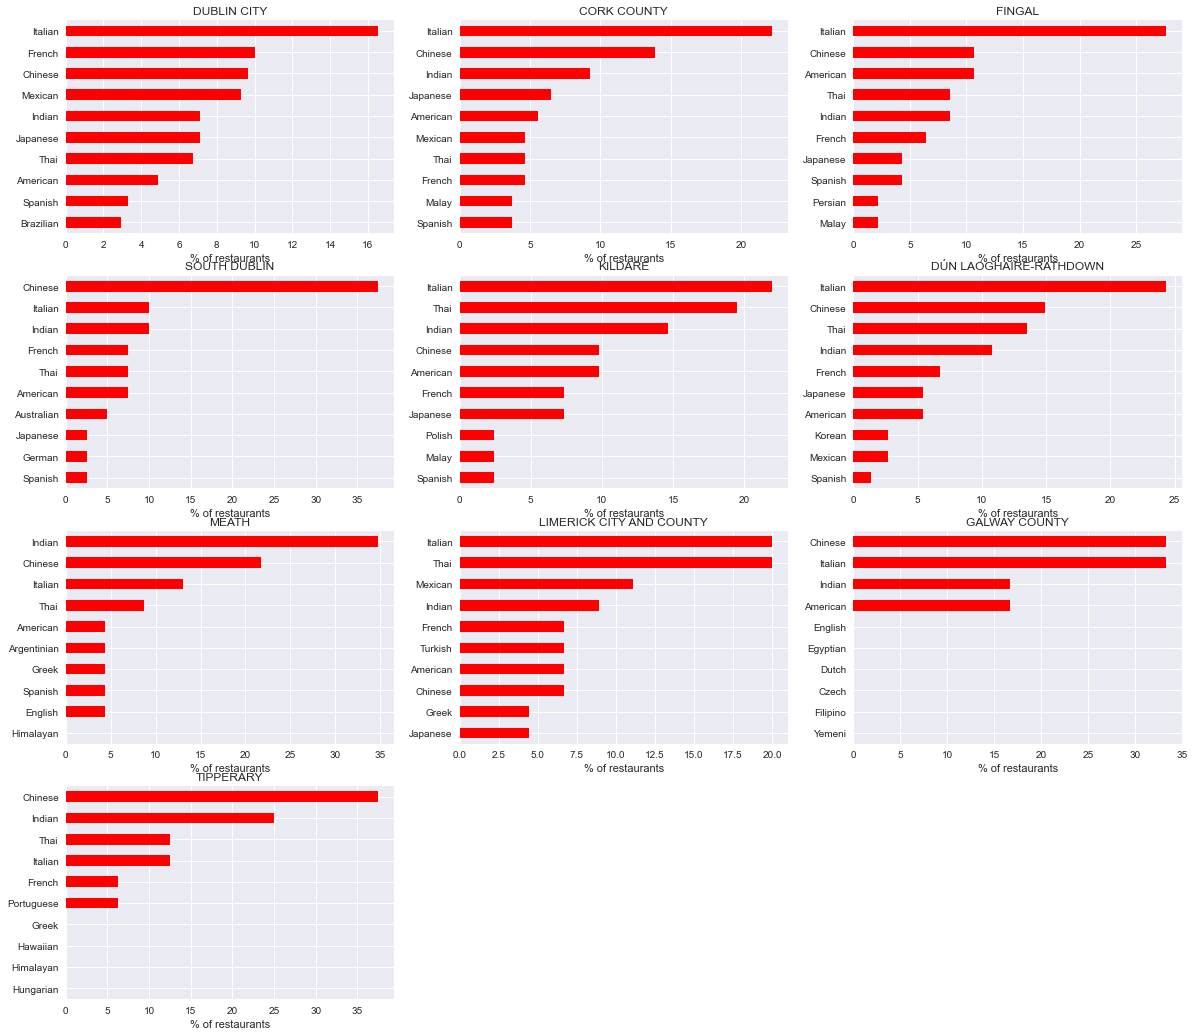

In [41]:
#Top 10 cuisine for each administrative area
fig = plt.figure()
for index, area in enumerate(req_aa):
    # For each city, get the top 10 cuisines and plot them in a horizontal bar graph
    ax = fig.add_subplot(4, 3, index+1)

    # Get the top 10 cuisines for the city
    cuisines = cuisines_city_normalized.loc[area['ADMINISTRATIVE_AREA']]
    cuisines = cuisines.sort_values(ascending=False).head(10).sort_values(ascending=True)
    
    color = 'r'
    
    # Plot the top 10 cuisines
    cuisines.plot(kind='barh', ax=ax, figsize=(20, 18), color=list(color))
    ax.set_title(area['ADMINISTRATIVE_AREA'])
    ax.set_xlabel("% of restaurants")

In [42]:
req_restaurants = restaurants_details.to_dict('records')

In [43]:
##### function to search google places ratings and price #####

#price_level — The price level of the place, on a scale of 0 to 4. The exact amount indicated by a specific value will vary from region to region. Price levels are interpreted as follows:
#0 — Free
#1 — Inexpensive
#2 — Moderate
#3 — Expensive
#4 — Very Expensive

def GetGooglePlacesRatingsandPrice(restaurants):
    # 'restaurants': array of dicts = [{u"name":u"El Celler de Can Roca",u"location":u"Girona"},{u"name":u"Koy Shunka",u"location":u"Barcelona"}]
     
    resturant_ratings = pd.DataFrame(columns=['Administrative_Area', 'Cuisine', 'Restaurant_id','Restaurant_Name', 'Restaurant_price', "Restaurant_Ratings", "User_Ratings_Total"]) ## define the DataFrame where the detailed results will be stored
    # set google places api
    from googleplaces import GooglePlaces, types, lang
    google_places_api_key = 'GOOGLE_PLACES_API_KEY'
    google_places = GooglePlaces(google_places_api_key)
    
    from difflib import SequenceMatcher
    def similar(a, b):
        return SequenceMatcher(None, a, b).ratio()
     
    # search restaurants
    for restaurant in restaurants:
        restaurantFound = 0
        restaurantName = restaurant["Restaurant_Name"].lower()
        restaurant_lat_lan = {'lat': restaurant['Restaurant_Lat'], 'lng':restaurant['Restaurant_Lon']}
 
        query_result = query_result = google_places.nearby_search(
        keyword=restaurantName,
        lat_lng=restaurant_lat_lan, 
        radius=1000,
        types=[types.TYPE_RESTAURANT] or [types.TYPE_FOOD] or [types.TYPE_CAFE],
        sensor="true")
         
        # loop query results
        for place in query_result.places:
            if similar(restaurantName, place.name.lower()) >= 0.7:
                place.get_details()
                if 'user_ratings_total' in place.details:
                    restarurantNumRatings=place.details['user_ratings_total']
                else:
                    restarurantNumRatings='-'
                if 'price_level' in place.details:
                    restarurantPrice=place.details['price_level']
                else:
                    restarurantPrice='-'
                    
                resturant_ratings = resturant_ratings.append({
                'Administrative_Area': restaurant["Administrative_Area"],
                'Cuisine':restaurant["Cuisine"],
                'Restaurant_id':restaurant["Restaurant_id"],   
                'Restaurant_Name': restaurant["Restaurant_Name"],
                'Restaurant_price': restarurantPrice,
                'Restaurant_Ratings': place.rating,
                'User_Ratings_Total': restarurantNumRatings
            }, ignore_index=True)
                restaurantFound = 1
                break
                
    return resturant_ratings

In [47]:
restaurant_ratings = GetGooglePlacesRatingsandPrice(req_restaurants)

In [49]:
restaurant_ratings

,Administrative_Area,Cuisine,Restaurant_id,Restaurant_Name,Restaurant_price,Restaurant_Ratings,User_Ratings_Total
0,DUBLIN CITY,African,4afbcb53f964a520141f22e3,Il Caffè di Napoli,2,4.5,816
1,DUBLIN CITY,African,4c13966ba5eb76b0f01ec0b7,Akanchawa's Honey Pot,1,3.8,6
2,DUBLIN CITY,American,4cdd9beaf8a4a1431027d1bc,The Butcher Grill,3,4.6,469
3,DUBLIN CITY,American,4b8d5387f964a520c1f432e3,TriBeCa,2,4.3,889
4,DUBLIN CITY,American,4ade0f09f964a520de7021e3,Hard Rock Cafe Dublin,3,4.2,4732
5,DUBLIN CITY,American,4af2d5a7f964a520abe821e3,Herbstreet,2,4.4,1520
6,DUBLIN CITY,American,4b19a00df964a520ade023e3,Eddie Rocket's,2,4.0,1777
7,DUBLIN CITY,American,54426aa3498e28f66d4b4353,Dolce Sicily,2,4.5,1861
8,DUBLIN CITY,American,50d17a39e4b08647fe9dc66f,Goose on the Loose,1,4.5,232
9,DUBLIN CITY,American,4b2289b0f964a520974824e3,Lemon Crêpe & Coffee Company,2,4.5,628


In [50]:
#restaurant_ratings.to_csv("Data/restaurants_ratings_by_cusine_and_county.csv", index = False)

In [51]:
restaurant_ratings.describe()

,Restaurant_Ratings
count,410.000000
mean,4.201951
std,0.636576
min,0.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,5.000000


In [52]:
restaurant_ratings.dtypes

Administrative_Area     object
Cuisine                 object
Restaurant_id           object
Restaurant_Name         object
Restaurant_price        object
Restaurant_Ratings     float64
User_Ratings_Total      object
dtype: object

In [53]:
restaurant_ratings['Restaurant_price'] = restaurant_ratings['Restaurant_price'].apply(pd.to_numeric, errors='coerce')
restaurant_ratings['Restaurant_Ratings'] = restaurant_ratings['Restaurant_Ratings'].apply(pd.to_numeric, errors='coerce')
restaurant_ratings['User_Ratings_Total'] = restaurant_ratings['User_Ratings_Total'].apply(pd.to_numeric, errors='coerce')

In [54]:
popular_cuisine_by_rating = restaurant_ratings[restaurant_ratings['User_Ratings_Total'].notna()]

In [55]:
popular_cuisine_by_rating =popular_cuisine_by_rating.groupby(['Administrative_Area','Cuisine'], as_index=False).agg({'Restaurant_Ratings':'mean', 'User_Ratings_Total':'mean'})

In [56]:
popular_cuisine_by_rating.head()

,Administrative_Area,Cuisine,Restaurant_Ratings,User_Ratings_Total
0,CORK COUNTY,American,4.150000,669.000000
1,CORK COUNTY,Brazilian,4.600000,99.000000
2,CORK COUNTY,Chinese,4.300000,194.000000
3,CORK COUNTY,English,4.500000,302.000000
4,CORK COUNTY,French,4.633333,347.666667


#### Deterining popular 10 cuisine based on average restaurant ratings serving particular cuisine in particular administrative areas:


In [57]:
# One-hot encoding
pop_restaurants_onehot = pd.get_dummies(popular_cuisine_by_rating['Cuisine'], prefix="", prefix_sep="")
pop_restaurants_onehot = pop_restaurants_onehot.multiply(popular_cuisine_by_rating['Restaurant_Ratings'], axis=0)
pop_restaurants_onehot = pd.concat([popular_cuisine_by_rating['Administrative_Area'], pop_restaurants_onehot], axis=1)

# Group by city
pop_cuisines_city = pop_restaurants_onehot.groupby('Administrative_Area').sum().reset_index()
pop_cuisines_city = pop_cuisines_city.set_index(keys='Administrative_Area')

pop_cuisines_city

,African,American,Argentinian,Australian,Belgian,Brazilian,Chinese,Czech,English,French,Greek,Hawaiian,Indian,Italian,Japanese,Korean,Malay,Mexican,Moroccan,Persian,Polish,Portuguese,Russian,Scottish,Spanish,Thai,Turkish,Vietnamese
Administrative_Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CORK COUNTY,0.00,4.150000,0.00,0.0,0.00,4.60,4.300000,0.0,4.500000,4.633333,0.0,0.0,4.166667,4.400000,4.566667,0.000,0.0,4.500000,4.60,0.0,4.6,0.00,0.000,0.0,4.600,4.35,4.300,0.00
DUBLIN CITY,4.15,4.263158,3.95,0.0,4.45,4.22,4.046429,4.5,4.133333,4.443478,4.4,4.4,4.126087,4.366000,4.347368,4.325,5.0,4.203125,4.25,4.4,0.0,4.35,4.375,4.4,4.225,4.26,4.125,4.44
DÚN LAOGHAIRE-RATHDOWN,0.00,3.950000,0.00,0.0,0.00,0.00,4.060000,0.0,0.000000,4.800000,0.0,0.0,0.000000,4.266667,4.400000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.000,0.00
FINGAL,0.00,4.066667,0.00,0.0,0.00,0.00,4.400000,0.0,0.000000,4.400000,0.0,0.0,4.500000,3.983333,0.000000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,4.400,4.30,0.000,0.00
KILDARE,0.00,4.100000,0.00,0.0,0.00,0.00,4.300000,0.0,0.000000,4.700000,0.0,0.0,4.700000,4.200000,4.650000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,4.40,0.000,0.00
LIMERICK CITY AND COUNTY,0.00,4.500000,0.00,0.0,0.00,0.00,4.500000,0.0,0.000000,4.400000,0.0,0.0,4.250000,4.433333,4.600000,0.000,0.0,4.200000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,4.50,3.300,0.00
MEATH,0.00,0.000000,0.00,0.0,0.00,0.00,4.400000,0.0,0.000000,0.000000,0.0,0.0,4.450000,4.300000,0.000000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,0.00,0.000,0.00
SOUTH DUBLIN,0.00,3.950000,0.00,4.3,0.00,0.00,4.075000,0.0,0.000000,4.300000,0.0,0.0,4.133333,0.000000,0.000000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,3.90,0.000,0.00
TIPPERARY,0.00,0.000000,0.00,0.0,0.00,0.00,4.050000,0.0,0.000000,0.000000,0.0,0.0,4.600000,3.400000,0.000000,0.000,0.0,0.000000,0.00,0.0,0.0,0.00,0.000,0.0,0.000,4.60,0.000,0.00


In [58]:
#From the data above, it is clear that we don not have ratings for restaurants across galway, hence
ratings_available_for_aa = pd.DataFrame(pop_cuisines_city.index).to_dict('records')

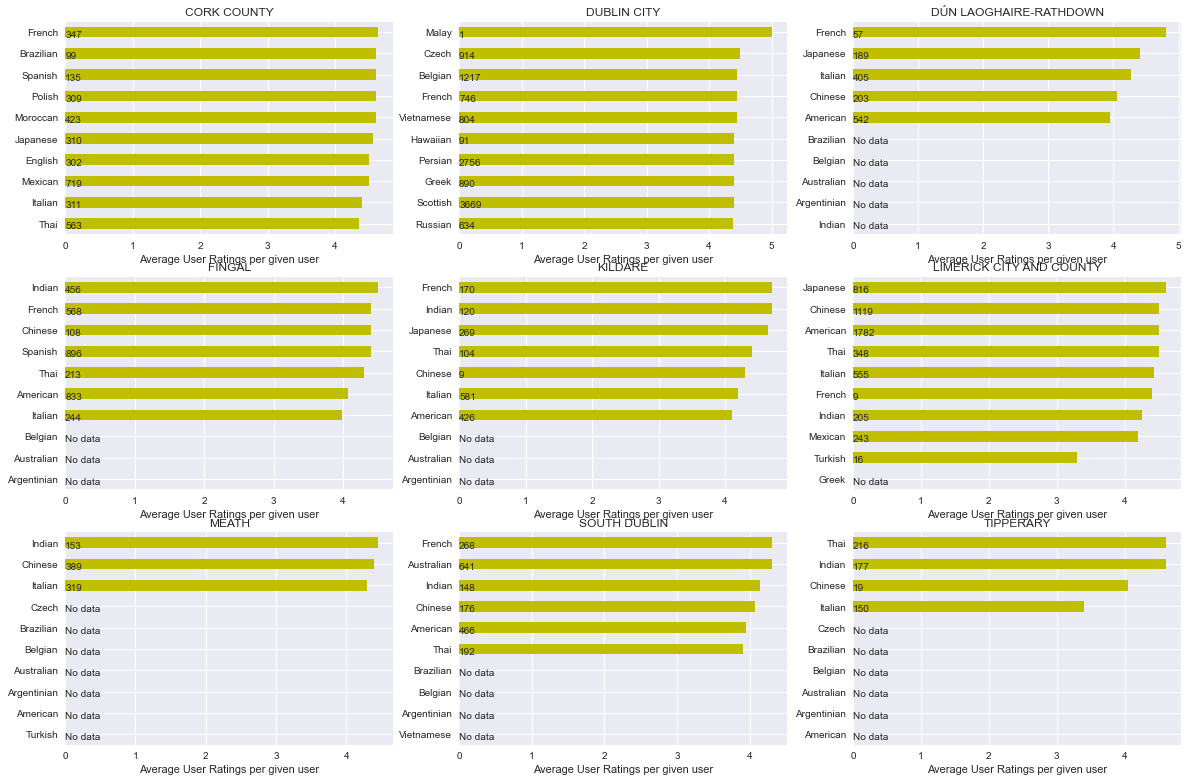

In [59]:
#Top 10 cuisine by average ratings in each administrative area
fig = plt.figure()
for index, area in enumerate(ratings_available_for_aa):
    # For each city, get the top 10 cuisines and plot them in a horizontal bar graph
    ax = fig.add_subplot(4, 3, index+1)

    # Get the top 10 cuisines for the city
    cuisines = pop_cuisines_city.loc[area['Administrative_Area']]
    cuisines = cuisines.sort_values(ascending=False).head(10).sort_values(ascending=True)
    
    color = 'y'
    
    # Plot the top 10 cuisines
    cuisines.plot(kind='barh', ax=ax, figsize=(20, 18), color=list(color))
    ax.set_title(area['Administrative_Area'])
    ax.set_xlabel("Average User Ratings per given user")
    for index, p in enumerate(ax.patches):
        text = popular_cuisine_by_rating['User_Ratings_Total'][(popular_cuisine_by_rating.Cuisine == cuisines.index[index]) & (popular_cuisine_by_rating.Administrative_Area  == cuisines.name)]
        if (len(text.values)>0):
            text = int(text.values[0])
        else:
            text ='No data'          
        ax.annotate(xy=p.get_xy(), s=text)

In [60]:
restaurants = pd.merge(restaurants_details, restaurant_ratings, how='left', on=['Administrative_Area', 'Cuisine', 'Restaurant_id','Restaurant_Name'])

#### Of all the data obtained so far, analyzing data for restaurants serving Indian

In [62]:
#Trying to determine actual restaurants that serve Indian and whose data is available to us per administrative area:
analyse_indian_restaurants = restaurants
analyse_indian_restaurants['Restaurant_Data_Available'] = analyse_indian_restaurants['Cuisine'].apply(lambda x: 1 if ('Indian' in x) else 0)

In [63]:
analyse_indian_restaurants.head()

,Administrative_Area,Cuisine,Restaurant_id,Restaurant_Name,Restaurant_Lat,Restaurant_Lon,Restaurant_price,Restaurant_Ratings,User_Ratings_Total,Restaurant_Data_Available
0,DUBLIN CITY,Afghan,57f544f4498e9282a9682873,Afghan Restaurant,53.338610,-6.265878,NaN,NaN,NaN,0
1,DUBLIN CITY,African,4e398411b61c438b5487b701,Akwaaba,53.352742,-6.244516,NaN,NaN,NaN,0
2,DUBLIN CITY,African,4afbcb53f964a520141f22e3,Il Caffè di Napoli,53.342692,-6.250147,2.0,4.5,816.0,0
3,DUBLIN CITY,African,4c13966ba5eb76b0f01ec0b7,Akanchawa's Honey Pot,53.354090,-6.269668,1.0,3.8,6.0,0
4,DUBLIN CITY,American,4cdd9beaf8a4a1431027d1bc,The Butcher Grill,53.324288,-6.252728,3.0,4.6,469.0,0


In [64]:
indin_restaurants_data_available = analyse_indian_restaurants.groupby(['Administrative_Area'], as_index=False).agg({'Restaurant_Data_Available':'sum'})

In [65]:
indin_restaurants_data_available

,Administrative_Area,Restaurant_Data_Available
0,CORK COUNTY,9
1,DUBLIN CITY,38
2,DÚN LAOGHAIRE-RATHDOWN,7
3,FINGAL,3
4,GALWAY COUNTY,0
5,KILDARE,5
6,LIMERICK CITY AND COUNTY,3
7,MEATH,7
8,SOUTH DUBLIN,3
9,TIPPERARY,3


In [66]:
indian_restaurant_total = restaurants_summary[restaurants_summary.Cuisine == 'Indian']

In [67]:
indian_restaurant_total

,Administrative_Area,Cuisine,Number of restaurants
35,DUBLIN CITY,Indian,39
100,CORK COUNTY,Indian,10
165,FINGAL,Indian,4
230,SOUTH DUBLIN,Indian,4
295,KILDARE,Indian,6
360,DÚN LAOGHAIRE-RATHDOWN,Indian,8
425,MEATH,Indian,8
490,LIMERICK CITY AND COUNTY,Indian,4
555,GALWAY COUNTY,Indian,1
620,TIPPERARY,Indian,4


In [68]:
data_for_analysis = pd.merge(indin_restaurants_data_available, indian_restaurant_total, on=['Administrative_Area'])

In [69]:
data_for_analysis

,Administrative_Area,Restaurant_Data_Available,Cuisine,Number of restaurants
0,CORK COUNTY,9,Indian,10
1,DUBLIN CITY,38,Indian,39
2,DÚN LAOGHAIRE-RATHDOWN,7,Indian,8
3,FINGAL,3,Indian,4
4,GALWAY COUNTY,0,Indian,1
5,KILDARE,5,Indian,6
6,LIMERICK CITY AND COUNTY,3,Indian,4
7,MEATH,7,Indian,8
8,SOUTH DUBLIN,3,Indian,4
9,TIPPERARY,3,Indian,4


In [70]:
data_for_analysis = data_for_analysis.merge(pop_data[['ADMINISTRATIVE_AREA','ASIAN_POPULATION','TOTAL_POPULATION']], left_on = "Administrative_Area", right_on = "ADMINISTRATIVE_AREA", how = 'left')

In [71]:
data_for_analysis.head()

,Administrative_Area,Restaurant_Data_Available,Cuisine,Number of restaurants,ADMINISTRATIVE_AREA,ASIAN_POPULATION,TOTAL_POPULATION
0,CORK COUNTY,9,Indian,10,CORK COUNTY,4436,412826
1,DUBLIN CITY,38,Indian,39,DUBLIN CITY,20172,537190
2,DÚN LAOGHAIRE-RATHDOWN,7,Indian,8,DÚN LAOGHAIRE-RATHDOWN,7571,213519
3,FINGAL,3,Indian,4,FINGAL,11514,292327
4,GALWAY COUNTY,0,Indian,1,GALWAY COUNTY,1591,177215


In [72]:
data_for_analysis['Number of restaurants'] = data_for_analysis['Number of restaurants'].apply(pd.to_numeric, errors='coerce')

#### Determining if a correlation exist between number of restaurants and different popultion demographics

In [73]:
data_for_analysis.corr().style.background_gradient(cmap='OrRd')

,Restaurant_Data_Available,Number of restaurants,ASIAN_POPULATION,TOTAL_POPULATION
Restaurant_Data_Available,1.000000,1.000000,0.765533,0.841339
Number of restaurants,1.000000,1.000000,0.765533,0.841339
ASIAN_POPULATION,0.765533,0.765533,1.000000,0.788330
TOTAL_POPULATION,0.841339,0.841339,0.788330,1.000000


Based on correlation above it indicates that there might be a good correlation between total population of an administrative area and and number of restaurants there.

Hence for our further analysis, we are only interested in restaurants across top 2 administrative areas with highest population.

In [74]:
data_for_analysis.sort_values(by = 'TOTAL_POPULATION',ascending=False).head(2)

,Administrative_Area,Restaurant_Data_Available,Cuisine,Number of restaurants,ADMINISTRATIVE_AREA,ASIAN_POPULATION,TOTAL_POPULATION
1,DUBLIN CITY,38,Indian,39,DUBLIN CITY,20172,537190
0,CORK COUNTY,9,Indian,10,CORK COUNTY,4436,412826


In [75]:
#Determining Restaurants that have multiple branches
restaurant_chain = restaurants.groupby('Restaurant_Name')['Administrative_Area'].apply(list).reset_index(name='Location')

In [76]:
#Determining Restaurants that have multtiple branches
restaurant_chain.head()

,Restaurant_Name,Location
0,10 Thousand,[DUBLIN CITY]
1,147 Deli,[DUBLIN CITY]
2,356 In The 353,[KILDARE]
3,777,[DUBLIN CITY]
4,Aberdeen Chinese Take Away,[DUBLIN CITY]


In [77]:
#Determining Restaurants that serve multiple cuisine
restaurant_multicuisine = restaurants.groupby('Restaurant_Name')['Cuisine'].apply(list).reset_index(name='Cuisine_Served')

In [78]:
restaurant_multicuisine.head()

,Restaurant_Name,Cuisine_Served
0,10 Thousand,[Chinese]
1,147 Deli,[Italian]
2,356 In The 353,[American]
3,777,[Mexican]
4,Aberdeen Chinese Take Away,[Chinese]


In [79]:
#Determining Restaurants with average ratings available
restaurant_avg_ratings = restaurants.groupby(['Restaurant_Name'], as_index=False).agg({'Restaurant_Ratings':lambda x: x.mean(skipna=False), 'User_Ratings_Total':lambda x: x.mean(skipna=False), 'Restaurant_price':lambda x: x.mean(skipna=False)})

In [80]:
restaurant_avg_ratings.head()

,Restaurant_Name,Restaurant_Ratings,User_Ratings_Total,Restaurant_price
0,10 Thousand,NaN,NaN,NaN
1,147 Deli,4.7,482.0,2.0
2,356 In The 353,NaN,NaN,NaN
3,777,4.3,847.0,2.0
4,Aberdeen Chinese Take Away,4.2,75.0,1.0


In [81]:
restaurants_analysis  = restaurant_chain.merge(restaurant_multicuisine,on='Restaurant_Name').merge(restaurant_avg_ratings,on='Restaurant_Name')

In [82]:
restaurants_analysis.head()

,Restaurant_Name,Location,Cuisine_Served,Restaurant_Ratings,User_Ratings_Total,Restaurant_price
0,10 Thousand,[DUBLIN CITY],[Chinese],NaN,NaN,NaN
1,147 Deli,[DUBLIN CITY],[Italian],4.7,482.0,2.0
2,356 In The 353,[KILDARE],[American],NaN,NaN,NaN
3,777,[DUBLIN CITY],[Mexican],4.3,847.0,2.0
4,Aberdeen Chinese Take Away,[DUBLIN CITY],[Chinese],4.2,75.0,1.0


In [83]:
#Determine number of cuisine each restaurant serve
restaurants_analysis['Number of Cuisines'] = restaurants_analysis['Cuisine_Served'].apply(lambda x: len(set(x)))

In [84]:
#Determine if these are located in multiple administrative areas
restaurants_analysis['Based in Multiple Location'] = restaurants_analysis['Location'].apply(lambda x: "YES" if (len((x)) > 1) else "NO") 

In [86]:
restaurants_analysis[restaurants_analysis['Based in Multiple Location'] == "YES"]

,Restaurant_Name,Location,Cuisine_Served,Restaurant_Ratings,User_Ratings_Total,Restaurant_price,Number of Cuisines,Based in Multiple Location
26,Aroi Asian Street Food,"[LIMERICK CITY AND COUNTY, LIMERICK CITY AND C...","[Thai, Thai]",4.500000,350.000000,1.0,1,YES
58,Bombay Pantry,"[DUBLIN CITY, DUBLIN CITY, DÚN LAOGHAIRE-RATHD...","[Indian, Indian, Indian]",NaN,NaN,NaN,1,YES
59,Bon Appetit,"[FINGAL, LIMERICK CITY AND COUNTY]","[French, French]",4.400000,288.500000,NaN,1,YES
62,Bonza Pies,"[DUBLIN CITY, DUBLIN CITY]","[Australian, Australian]",NaN,NaN,NaN,1,YES
63,Boojum,"[DUBLIN CITY, DUBLIN CITY, DUBLIN CITY, DUBLIN...","[Mexican, Mexican, Mexican, Mexican, Mexican, ...",NaN,NaN,NaN,1,YES
68,Brother Hubbard South,"[DUBLIN CITY, DUBLIN CITY, DUBLIN CITY]","[French, Mexican, Turkish]",4.400000,804.000000,2.0,3,YES
78,Burritos & Blues,"[DUBLIN CITY, DUBLIN CITY, CORK COUNTY]","[Mexican, Mexican, Mexican]",4.166667,402.333333,NaN,1,YES
80,Cactus Jacks,"[DUBLIN CITY, DUBLIN CITY]","[Mexican, Spanish]",4.100000,746.000000,2.0,2,YES
93,Camile Thai,"[DUBLIN CITY, DUBLIN CITY, DUBLIN CITY, DUBLIN...","[Thai, Thai, Thai, Thai]",NaN,NaN,NaN,1,YES
130,Coppinger Row,"[DUBLIN CITY, DUBLIN CITY]","[Italian, Moroccan]",4.400000,526.000000,2.0,2,YES


In [87]:
#Create a flag for Indian Restaurants.
restaurants_analysis['Serve_Indian'] = restaurants_analysis['Cuisine_Served'].apply(lambda x: "YES" if ('Indian' in x) else "NO")

In [88]:
restaurants_analysis.head()

,Restaurant_Name,Location,Cuisine_Served,Restaurant_Ratings,User_Ratings_Total,Restaurant_price,Number of Cuisines,Based in Multiple Location,Serve_Indian
0,10 Thousand,[DUBLIN CITY],[Chinese],NaN,NaN,NaN,1,NO,NO
1,147 Deli,[DUBLIN CITY],[Italian],4.7,482.0,2.0,1,NO,NO
2,356 In The 353,[KILDARE],[American],NaN,NaN,NaN,1,NO,NO
3,777,[DUBLIN CITY],[Mexican],4.3,847.0,2.0,1,NO,NO
4,Aberdeen Chinese Take Away,[DUBLIN CITY],[Chinese],4.2,75.0,1.0,1,NO,NO


In [89]:
indian_restaurants = restaurants_analysis[restaurants_analysis.Serve_Indian == 'YES'].copy()

In [90]:
indian_restaurants['Located_in_Dublin_City'] = indian_restaurants['Location'].apply(lambda x: "YES" if ('DUBLIN CITY' in x) else "NO")

In [91]:
indian_restaurants['Located_in_County_Cork'] = indian_restaurants['Location'].apply(lambda x: "YES" if ('CORK COUNTY' in x) else "NO")

In [92]:
print("Total number of Indian Restaurants identified across Top 10 administrative areas are, ", len(indian_restaurants))
print("Number of Indian Restaurants identified across administrative area Dublin City are, ", len(indian_restaurants[indian_restaurants.Located_in_Dublin_City == 'YES']))
print("Number of Indian Restaurants identified across administrative area County Cork are, ", len(indian_restaurants[indian_restaurants.Located_in_County_Cork == 'YES']))

Total number of Indian Restaurants identified across Top 10 administrative areas are,  73
Number of Indian Restaurants identified across administrative area Dublin City are,  36
Number of Indian Restaurants identified across administrative area County Cork are,  9


#### Summary of Restaurants serving Indian in Dublin City

In [93]:
dublin_restaurants = indian_restaurants.groupby(['Number of Cuisines','Located_in_Dublin_City','Based in Multiple Location'], as_index=False)['Serve_Indian'].size().reset_index(name='Number of Restaurants')
dublin_restaurants = dublin_restaurants[dublin_restaurants.Located_in_Dublin_City == 'YES']
dublin_restaurants

,Number of Cuisines,Located_in_Dublin_City,Based in Multiple Location,Number of Restaurants
1,1,YES,NO,29
2,1,YES,YES,4
4,2,YES,YES,3


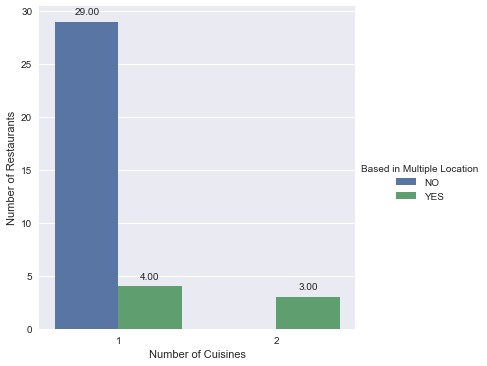

In [94]:
import seaborn as sns
splot = sns.catplot(x='Number of Cuisines', y='Number of Restaurants', hue='Based in Multiple Location', kind='bar', data=dublin_restaurants)
for ax in splot.axes.ravel():
      for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [95]:
latitude_x = 53.35512
longitude_y = -6.24922

dub_rest_locs = restaurants[(restaurants.Administrative_Area=='DUBLIN CITY') & (restaurants.Cuisine == 'Indian')].copy()
dub_rest_locs['Restaurant_Lat'] = dub_rest_locs['Restaurant_Lat'].apply(pd.to_numeric, errors='coerce')
dub_rest_locs['Restaurant_Lon'] = dub_rest_locs['Restaurant_Lon'].apply(pd.to_numeric, errors='coerce')

map_DC_Restaurants = folium.Map(location=[latitude_x, longitude_y], zoom_start=13) 
for lat, lng, nei in zip(dub_rest_locs['Restaurant_Lat'], dub_rest_locs['Restaurant_Lon'], dub_rest_locs['Restaurant_Name']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7, 
        parse_html=True).add_to(map_DC_Restaurants)  
    
map_DC_Restaurants

#### Summary of Restaurants serving Indian in County Cork

In [98]:
cork_restaurants = indian_restaurants.groupby(['Number of Cuisines','Located_in_County_Cork','Based in Multiple Location'], as_index=False)['Serve_Indian'].size().reset_index(name='Number of Restaurants')
cork_restaurants = cork_restaurants[cork_restaurants.Located_in_County_Cork == 'YES']
cork_restaurants

,Number of Cuisines,Located_in_County_Cork,Based in Multiple Location,Number of Restaurants
2,1,YES,NO,8
3,1,YES,YES,1


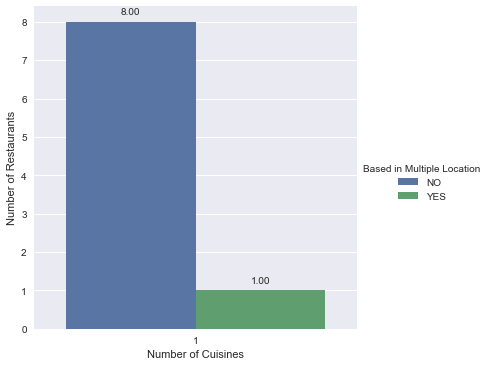

In [99]:
import seaborn as sns
splot = sns.catplot(x='Number of Cuisines', y='Number of Restaurants', hue='Based in Multiple Location', kind='bar', data=cork_restaurants)
for ax in splot.axes.ravel():
      for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [100]:
latitude_x = 51.96667
longitude_y = -8.58333

cc_rest_locs = restaurants[(restaurants.Administrative_Area=='CORK COUNTY') & (restaurants.Cuisine == 'Indian')].copy()
cc_rest_locs['Restaurant_Lat'] = cc_rest_locs['Restaurant_Lat'].apply(pd.to_numeric, errors='coerce')
cc_rest_locs['Restaurant_Lon'] = cc_rest_locs['Restaurant_Lon'].apply(pd.to_numeric, errors='coerce')

map_CC_Restaurants = folium.Map(location=[latitude_x, longitude_y], zoom_start=13) 
for lat, lng, nei in zip(cc_rest_locs['Restaurant_Lat'], cc_rest_locs['Restaurant_Lon'], cc_rest_locs['Restaurant_Name']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(map_CC_Restaurants)  
    
map_CC_Restaurants